# DAT402 Project 1
### Machine Learning Analysis of Alzheimers Data
#### By: Philip Krause and Dylan Urias

We are using the dataset called "Alzheimer’s Prediction Dataset (Global).  This dataset can be found on Kaggle.  (https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global/data).  The data is made up of over twenty different variables that may affect the risk of someone developing Alzheimer's. There are 74,283 unique observations.
The dataset contains 25 columns:

1. Country (Categorical)
2. Age (Numerical)
3. Gender (Categorical)
4. Education Level (Numerical)
5. BMI (Numerical)
6. Physical Activity (Categorical)
7. Smoking Status (Categorical)
8. Alcohol Consumption (Categorical)
9. Diabetes (Binary)
10. Hypertension (Binary)
11. Cholesterol Level (Categorical)
12. Family History of Alzheimer's (Binary)
13. Cognitive Test Score (Numerical)
14. Depression Level (Categorical)
15. Sleep Quality (Categorical)
16. Dietary Habits (Categorical)
17. Air Pollution Exposure (Categorical)
18. Employment Status (Categorical)
19. Marital Status (Categorical)
20. Genetic Risk Factor (Binary)
21. Social Engagement Level (Categorical)
22. Income Level (Categorical)
23. Stress Levels (Categorical)
24. Urban vs Rural Living (Categorical)
25. Alzheimer's Diagnosis (Binary)

Our goal in this project is to apply various machine learning techniques to this data to predict whether someone has or will develop alzheimers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

### Cleaning up Data and Adjusting Variables

In [13]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

#Cleaning up column names
df = df.drop(columns=['Country'])
df.rename(columns={'Alzheimer’s Diagnosis': 'Diagnosis', 'Family History of Alzheimer’s': 'Family History', 
                  'Genetic Risk Factor (APOE-ε4 allele)': 'Genetic Risk Factor'}, inplace=True)

#Binary to Numerical
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1,'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1,'No': 0})
df['Hypertension'] = df['Hypertension'].map({'Yes': 1,'No': 0})
df['Family History'] = df['Family History'].map({'Yes': 1,'No': 0})
df['Genetic Risk Factor'] = df['Genetic Risk Factor'].map({'Yes': 1,'No': 0})

#Categorical to Numerical
df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
df['Physical Activity Level'] = df['Physical Activity Level'].map({'High': 2,'Medium': 1,'Low': 0})
df['Smoking Status'] = df['Smoking Status'].map({'Current': 2,'Former': 1,'Never': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Regularly': 2,'Occasionally': 1,'Never': 0})
df['Cholesterol Level'] = df['Cholesterol Level'].map({'High': 1,'Normal': 0})
df['Depression Level'] = df['Depression Level'].map({'High': 2,'Medium': 1,'Low': 0})
df['Sleep Quality'] = df['Sleep Quality'].map({'Poor': 2,'Average': 1,'Good': 0})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 2,'Average': 1,'Healthy': 0})
df['Air Pollution Exposure'] = df['Air Pollution Exposure'].map({'High': 2,'Medium': 1,'Low': 0})
df['Employment Status'] = df['Employment Status'].map({'Unemployed': 2,'Employed': 1,'Retired': 0})
df['Marital Status'] = df['Marital Status'].map({'Widowed': 2,'Married': 1,'Single': 0})
df['Social Engagement Level'] = df['Social Engagement Level'].map({'High': 2,'Medium': 1,'Low': 0})
df['Income Level'] = df['Income Level'].map({'High': 2,'Medium': 1,'Low': 0})
df['Stress Levels'] = df['Stress Levels'].map({'High': 2,'Medium': 1,'Low': 0})
df['Urban vs Rural Living'] = df['Urban vs Rural Living'].map({'Urban': 1,'Rural': 0})

df.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor,Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Diagnosis
0,90,1,1,33.0,1,0,1,0,0,0,...,0,2,0,0,0,0,1,2,1,0
1,72,1,7,29.9,1,1,0,0,0,0,...,0,1,2,2,0,2,0,2,1,0
2,86,0,19,22.9,2,2,1,0,1,0,...,1,1,1,0,0,0,1,2,0,0
3,53,1,17,31.2,0,0,2,1,0,0,...,0,1,0,0,0,2,1,0,0,0
4,58,0,3,30.0,2,1,0,1,0,0,...,2,2,1,1,0,0,1,2,0,0


In [3]:
#See if any columns have nulls
df.isnull().sum(axis=0)

Age                        0
Gender                     0
Education Level            0
BMI                        0
Physical Activity Level    0
Smoking Status             0
Alcohol Consumption        0
Diabetes                   0
Hypertension               0
Cholesterol Level          0
Family History             0
Cognitive Test Score       0
Depression Level           0
Sleep Quality              0
Dietary Habits             0
Air Pollution Exposure     0
Employment Status          0
Marital Status             0
Genetic Risk Factor        0
Social Engagement Level    0
Income Level               0
Stress Levels              0
Urban vs Rural Living      0
Diagnosis                  0
dtype: int64

Here we can see that there are no null values in this data set, so nothing needs to be done on our part

## Exploratory Data Analysis

Text(0.5, 1.0, 'Diagnosis')

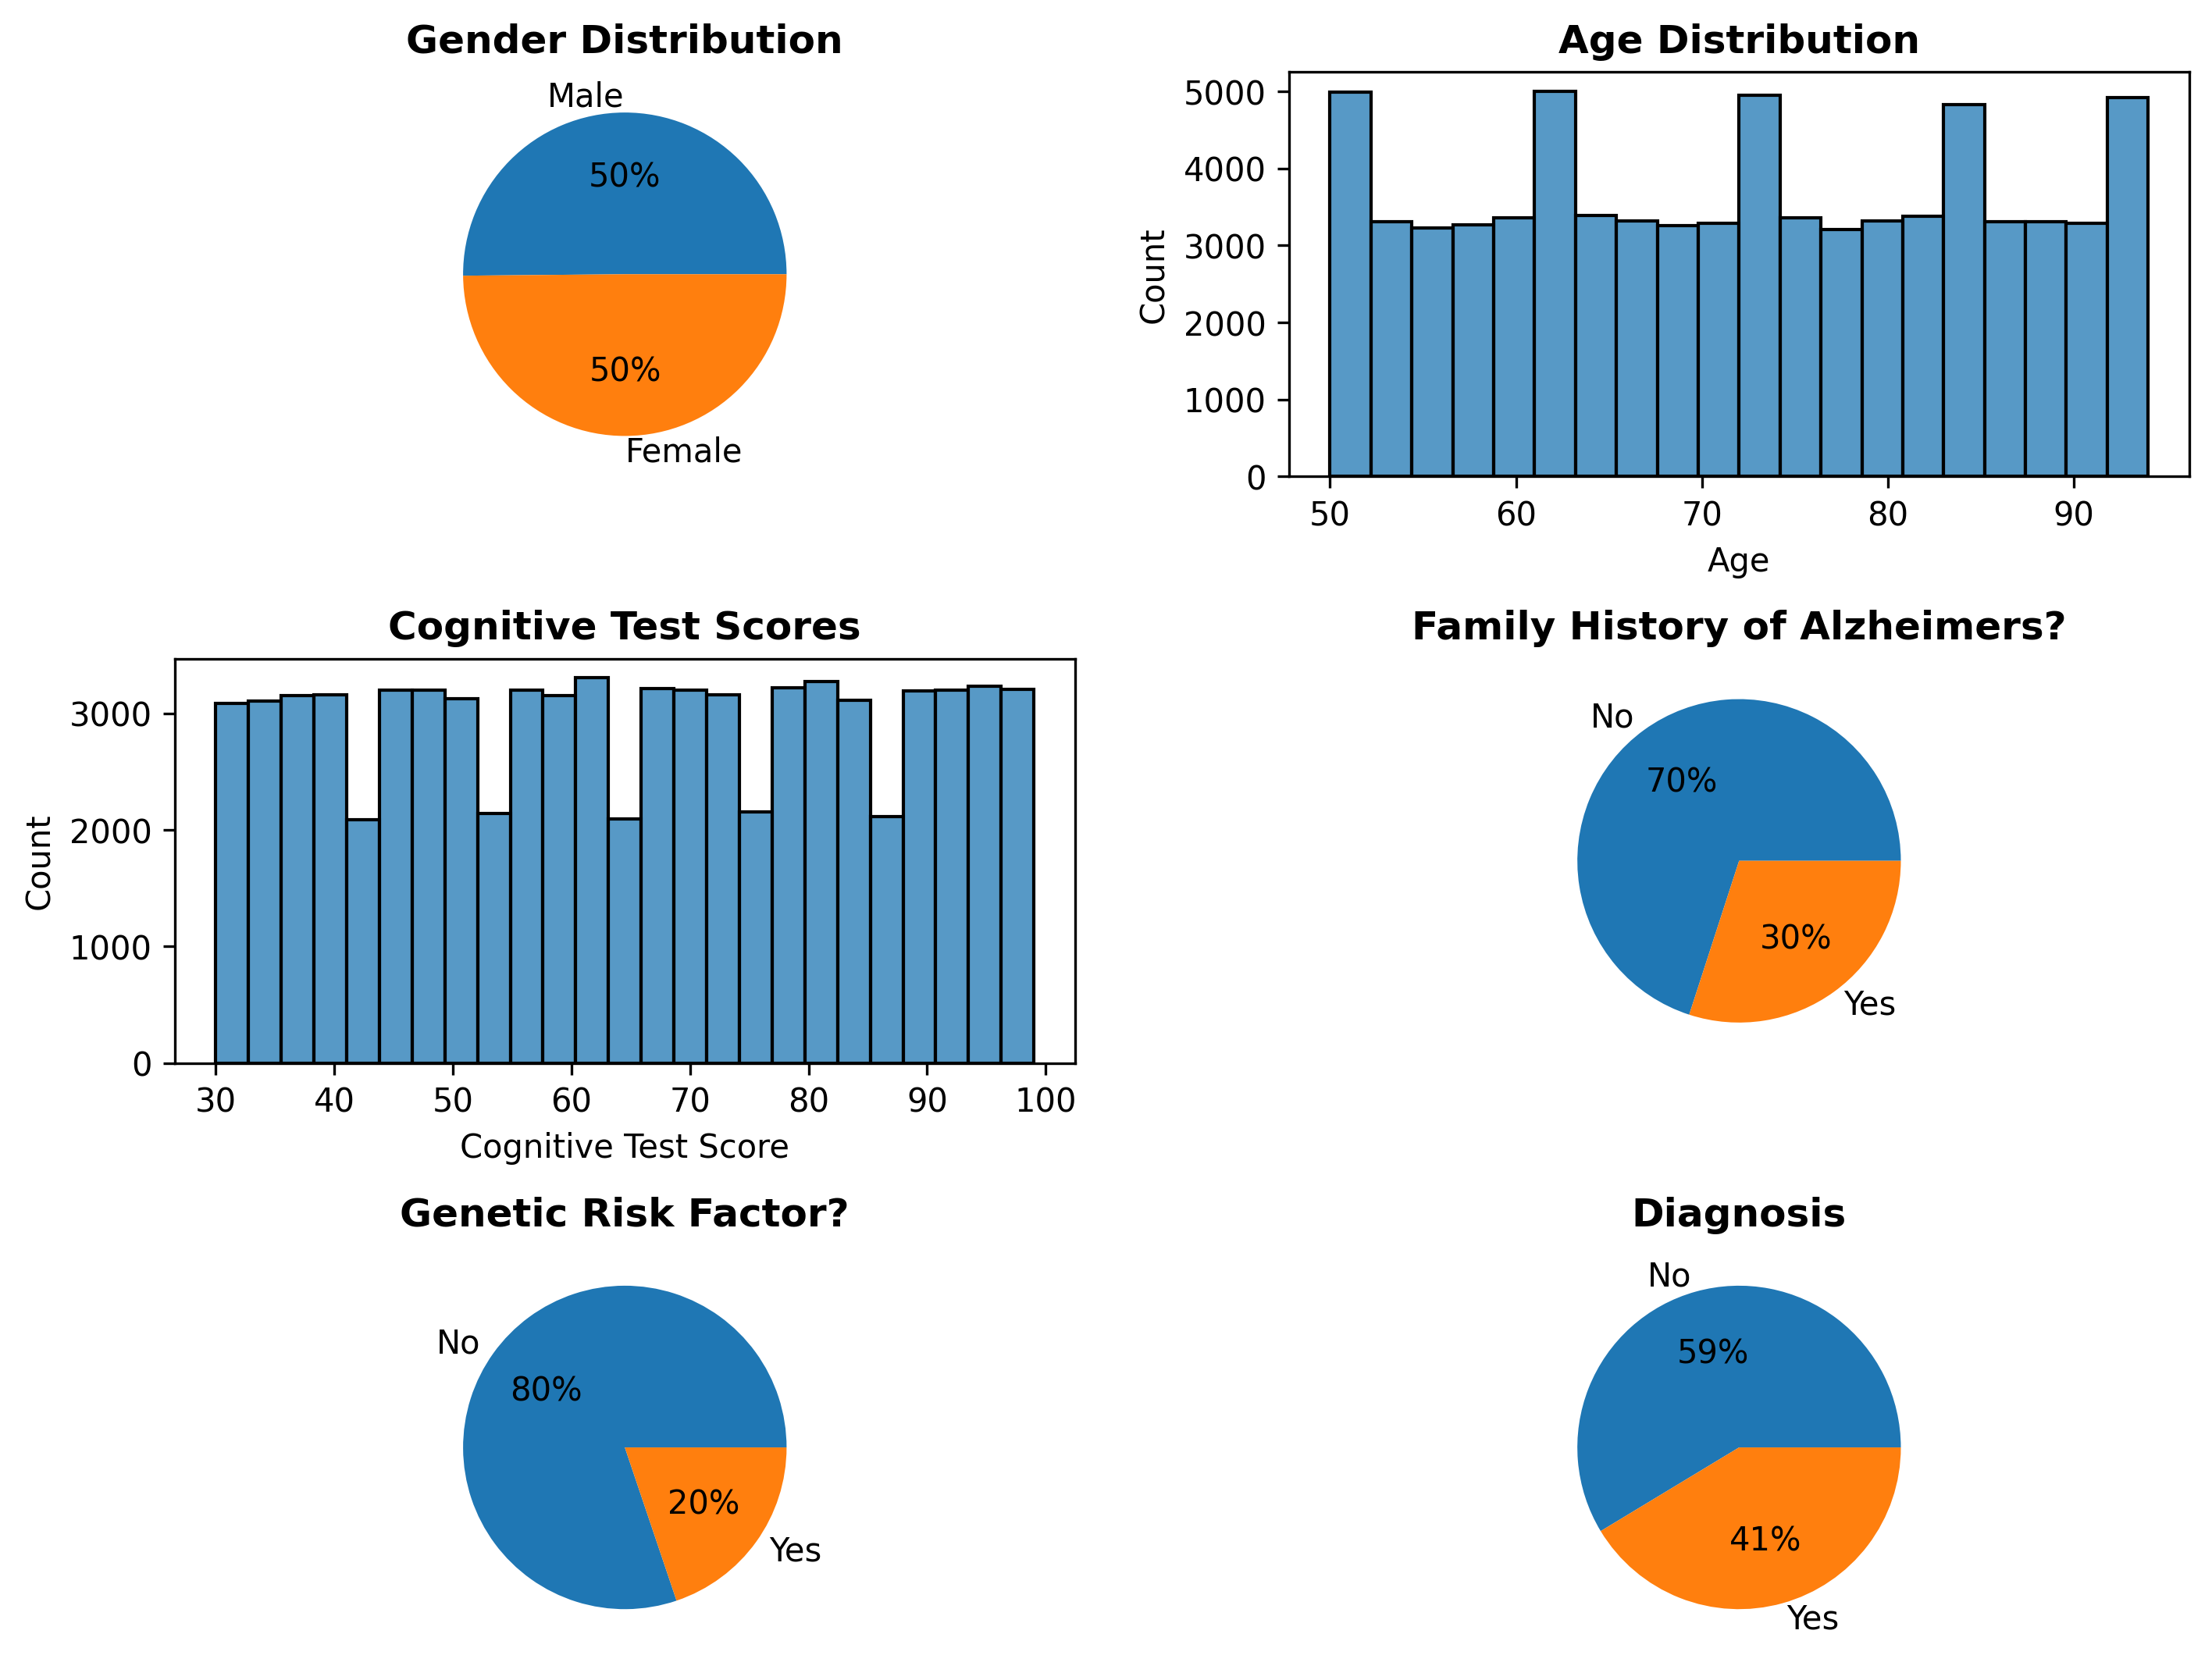

In [4]:
fig, ax1 = plt.subplots(3,2, dpi = 300, figsize=(10, 8))
fig.tight_layout(pad = 3.5)

#Gender pie chart
df.groupby('Gender').size().plot(ax = ax1[0][0],kind='pie', autopct='%1.0f%%', labels = ['Male', 'Female'])
ax1[0][0].set_title('Gender Distribution', fontweight='bold')

#Age Histogram
sns.histplot(ax = ax1[0][1], data = df, x = 'Age', bins = 20)
ax1[0][1].set_title('Age Distribution', fontweight='bold')

#Test Histogram
sns.histplot(ax = ax1[1][0], data = df, x = 'Cognitive Test Score', bins = 25)
ax1[1][0].set_title('Cognitive Test Scores', fontweight='bold')

#Family History Pie
df.groupby('Family History').size().plot(ax = ax1[1][1],kind='pie', autopct='%1.0f%%', labels = ['No', 'Yes'])
ax1[1][1].set_title('Family History of Alzheimers?', fontweight='bold')

#Genetic Risk Pie
df.groupby('Genetic Risk Factor').size().plot(ax = ax1[2][0],kind='pie', autopct='%1.0f%%', labels = ['No', 'Yes'])
ax1[2][0].set_title('Genetic Risk Factor?', fontweight='bold')

#Diagnosis Pie
df.groupby('Diagnosis').size().plot(ax = ax1[2][1],kind='pie', autopct='%1.0f%%', labels = ['No', 'Yes'])
ax1[2][1].set_title('Diagnosis', fontweight='bold')


# Naive Bayes With All Variables

In [5]:
## Creating test and train data

np.random.seed(369)

random_df = df.sample(frac=1)  
trainN = round(len(random_df) * 0.75)

train_data = random_df[:trainN].reset_index(drop=True)
test_data = random_df[trainN:].reset_index(drop=True)

train_X = train_data.iloc[:,:-1]
train_Y = train_data['Diagnosis']

test_X = test_data.iloc[:,:-1]
test_Y = test_data['Diagnosis']

In [6]:
## Creating Naive Bayes model
NB_model = CategoricalNB()  
NB_model.fit(train_X,train_Y)

## Checking Accuracy of model on train data
yhat_train = NB_model.predict(train_X)
print('Training Accuracy = ' + str(accuracy_score(yhat_train, train_Y)))
pd.crosstab(yhat_train, train_Y)

Training Accuracy = 0.7281375646180356


Diagnosis,0,1
row_0,,
0,24066,6566
1,8580,16500


In [7]:
## Checking accuracy on test data
yhat_test = NB_model.predict(test_X)

print('Testing Accuracy = ' + str(accuracy_score(yhat_test, test_Y)))
pd.crosstab(yhat_test, test_Y)

Testing Accuracy = 0.7248398039954769


Diagnosis,0,1
row_0,,
0,8107,2293
1,2817,5354


The first set of results are checks for the accuracy of the model on the testing data. This was done out of curiosity and does not refelct the actual accuracy. From the second set of results, we can see that this model has a 72.5% accuracy at predicting a diagnosis of Alzheimer's.

# Naive Bayes With Selected Variables

In [8]:
#Choosing columns that are often correlated with alzheimer's
NB_column_list = ['Age', 'Gender', 'BMI', 'Physical Activity Level','Smoking Status','Hypertension','Cholesterol Level','Sleep Quality','Family History','Cognitive Test Score',
                 'Genetic Risk Factor','Diagnosis']

df_select_NB = df[NB_column_list]
df_select_NB.head()

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Hypertension,Cholesterol Level,Sleep Quality,Family History,Cognitive Test Score,Genetic Risk Factor,Diagnosis
0,90,1,33.0,1,0,0,0,2,0,90,0,0
1,72,1,29.9,1,1,0,0,0,0,65,0,0
2,86,0,22.9,2,2,1,0,0,0,43,0,0
3,53,1,31.2,0,0,0,0,1,0,81,0,0
4,58,0,30.0,2,1,0,0,2,0,49,0,0


In [9]:
np.random.seed(369)

random_select_df = df_select_NB.sample(frac=1)  
trainN = round(len(random_select_df) * 0.75)

train_data = random_select_df[:trainN].reset_index(drop=True)
test_data = random_select_df[trainN:].reset_index(drop=True)

train_X = train_data.iloc[:,:-1]
train_Y = train_data['Diagnosis']

test_X = test_data.iloc[:,:-1]
test_Y = test_data['Diagnosis']


NB_model = CategoricalNB()  
NB_model.fit(train_X,train_Y)

yhat_train = NB_model.predict(train_X)

print('Training Accuracy = ' + str(accuracy_score(yhat_train, train_Y)))
pd.crosstab(yhat_train, train_Y)

Training Accuracy = 0.7277426766226307


Diagnosis,0,1
row_0,,
0,23999,6521
1,8647,16545


In [10]:
yhat_test = NB_model.predict(test_X)

print('Testing Accuracy = ' + str(accuracy_score(yhat_test, test_Y)))
pd.crosstab(yhat_test, test_Y)

Testing Accuracy = 0.7234936190835173


Diagnosis,0,1
row_0,,
0,8066,2277
1,2858,5370


This second analysis using Naive Bayes was done to see if selecting variables that appear the most correlated would improve accuracy by reducing the complexity of the model. The accuracy of this model was 72.3% which is nearly identical to that of the previous model, so we cannot conclude that reducing the complexity, in this instance, was the right choice.

## K Nearest Neighbors Analysis

This code would not run when using the full dataset, so here we have taken a random sample of 1000 instances in order for the program to run. Additionally, to reduce complexity, we have reduced the number of variables being considered.

In [11]:
np.random.seed(369)

random_df = df.copy()
random_df = random_df.sample(frac=1)


knn_column_list = ['Age', 'Gender', 'BMI', 'Physical Activity Level','Smoking Status','Hypertension','Cholesterol Level',
                   'Sleep Quality','Family History','Cognitive Test Score', 'Genetic Risk Factor','Diagnosis']

random_df = random_df[knn_column_list]


random_sample_df = random_df[:1000]
random_sample_df.head()

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Hypertension,Cholesterol Level,Sleep Quality,Family History,Cognitive Test Score,Genetic Risk Factor,Diagnosis
53624,58,1,23.0,1,0,0,0,0,1,37,0,0
1446,91,1,30.2,0,2,0,0,1,0,34,0,1
34250,72,1,19.5,2,0,0,0,0,0,58,0,1
27976,80,0,26.6,1,0,0,0,0,0,65,0,1
29491,55,0,19.0,0,0,0,0,0,0,56,0,0


The variables "Age" and "Cognitive Test Score" have large values, so we must rescale them because KNN utilizes distances.

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

scaler = RobustScaler()
random_sample_df.loc[:,'Age'] = scaler.fit_transform(random_sample_df.loc[:,'Age'].values.reshape(-1, 1))
random_sample_df.loc[:,'Cognitive Test Score'] = scaler.fit_transform(random_sample_df.loc[:,'Cognitive Test Score'].values.reshape(-1, 1))

random_sample_df.head()

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Hypertension,Cholesterol Level,Sleep Quality,Family History,Cognitive Test Score,Genetic Risk Factor,Diagnosis
53624,-0.608696,1,23.0,1,0,0,0,0,1,-0.764706,0,0
1446,0.826087,1,30.2,0,2,0,0,1,0,-0.852941,0,1
34250,0.000000,1,19.5,2,0,0,0,0,0,-0.147059,0,1
27976,0.347826,0,26.6,1,0,0,0,0,0,0.058824,0,1
29491,-0.739130,0,19.0,0,0,0,0,0,0,-0.205882,0,0


In [15]:
## Splitting up data
trainN = round(len(random_sample_df) * 0.75)

train_data = random_sample_df[:trainN].reset_index(drop=True)
test_data = random_sample_df[trainN:].reset_index(drop=True)

train_X = train_data.iloc[:,:-1]
train_Y = train_data['Diagnosis']

test_X = test_data.iloc[:,:-1]
test_Y = test_data['Diagnosis']

In [16]:
## Creating chart to visualize the accuracy of k values
train_score = {}
test_score = {}
k_options = np.arange(1, 150, 1)
for k in k_options:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(train_X, train_Y)
    train_score[k]=knn_model.score(train_X, train_Y)
    test_score[k]=knn_model.score(test_X, test_Y)

Text(0.5, 1.0, 'k Value Accuracies')

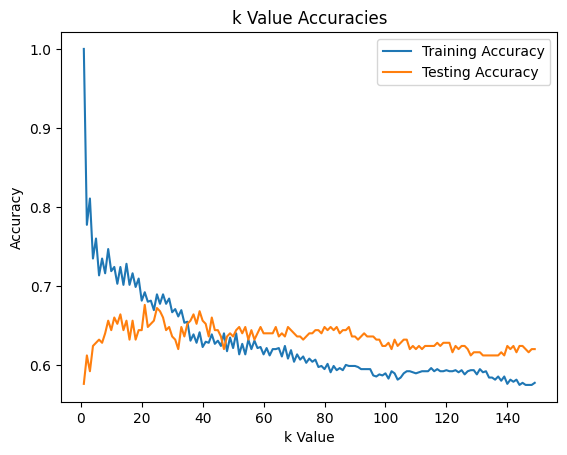

In [17]:
## Plotting accuracy values
plt.plot(k_options, train_score.values(), label="Training Accuracy")
plt.plot(k_options, test_score.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.title("k Value Accuracies")

In [18]:
parameters = {"n_neighbors": range(1, 120)}

grid_search = GridSearchCV(knn_model, parameters, cv=5)
grid_search.fit(train_X, train_Y)

optimal_k = grid_search.best_params_
print('k = ' + str(optimal_k['n_neighbors']))

k = 11


In [19]:
knn_optimal_model = KNeighborsClassifier(n_neighbors = optimal_k['n_neighbors'])
knn_optimal_model.fit(train_X, train_Y)

yhat_test = knn_optimal_model.predict(test_X)

print('Testing Accuracy = ' + str(accuracy_score(yhat_test, test_Y)))
pd.crosstab(yhat_test, test_Y)

Testing Accuracy = 0.66


Diagnosis,0,1
row_0,,
0,121,56
1,29,44


Using a grid search, we have found that the optimal k value for our data is 11 nearest neighbors. Using this value, we can see that our model's accuracy is 66%.

# Conclusion

After performing two Naïve Bayes analyses and a K-Nearest Neighbors analysis, we concluded that the Naïve Bayes model using all independent variables was the most accurate, achieving an accuracy score of 72.5%. Our second Naïve Bayes model, which included only the variables "Age," "Gender," "BMI," "Physical Activity Level," "Smoking Status," "Hypertension," "Cholesterol Level," "Sleep Quality," "Family History," "Cognitive Test Score," and "Genetic Risk Factor," produced a slightly lower accuracy score of 72.3%. Reducing the complexity of the Naïve Bayes model did not appear to improve its accuracy. The K-Nearest Neighbors model (with an optimal k value of 11) yielded an even lower accuracy score of 66%. This may be due to the fact that a k nearest neighbors model works better with fewer variables to consider. Ultimately, we conclude that our first Naïve Bayes model demonstrated the highest predictive power and outperformed all other models. No model proved to be very accurate, but that is not very surprising because even outside of this dataset, there is no accurate way to predict Alzheimer's disease.